In [ ]:
import nltk
import string
import math
import random
import pandas as pd
import numpy as np
nltk.download('punkt')


from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text = """
Natural language processing is a branch of artificial intelligence that focuses on the interaction between computers and human language. It enables machines to understand interpret and generate human language in a meaningful way. Language models play a crucial role in many natural language processing applications. A language model predicts the probability of a sequence of words occurring in a sentence.

In recent years language modeling has gained importance due to the rise of machine learning and deep learning techniques. Early language models were based on simple statistical methods such as unigram bigram and trigram models. These models estimate probabilities using word frequencies observed in a training corpus. Although simple n gram models provide a strong foundation for understanding more complex models.

Unigram models assume that each word is independent of the previous word. This assumption is unrealistic but computationally efficient. Bigram models consider the probability of a word given the previous word allowing limited context awareness. Trigram models extend this idea further by considering two previous words resulting in better predictions but increased data sparsity.

Data sparsity is a major challenge in n gram language models. As the value of n increases the number of possible word combinations grows exponentially. Many word sequences may never appear in the training data. This leads to zero probability issues when evaluating sentences. To address this problem smoothing techniques such as add one smoothing are applied.

Add one smoothing assigns a small probability to unseen words and n grams. This ensures that no sentence receives a zero probability. While smoothing improves robustness it may slightly reduce accuracy for frequently occurring words. Despite this limitation smoothing is essential for practical language modeling.

Perplexity is a standard metric used to evaluate language models. It measures how well a model predicts a sequence of words. Lower perplexity indicates that the model is better at predicting the test data. Unigram models usually have higher perplexity because they ignore context. Bigram models generally achieve lower perplexity by incorporating previous word information.

Trigram models can further reduce perplexity when sufficient training data is available. However when the dataset is small trigram models may perform worse due to data sparsity. Therefore selecting the appropriate n gram model depends on the size and nature of the dataset.

Language models are widely used in real world applications. In speech recognition systems language models help choose the most likely word sequence from multiple possibilities. In machine translation language models ensure grammatical correctness of translated text. Search engines use language models to rank relevant documents.

Autocomplete and text prediction systems rely heavily on language modeling. When a user types a word the system predicts the next word based on learned probabilities. Chatbots and virtual assistants also use language models to generate natural responses. Email spam filtering systems analyze text patterns using probabilistic models.

Preprocessing is an important step in building language models. Text is converted to lowercase to maintain uniformity. Punctuation and numbers are removed to reduce noise. Tokenization splits text into individual words. Sentence boundary markers such as start and end tokens help models learn sentence structure.

Training and testing data must be separated to evaluate model performance fairly. Typically eighty percent of the data is used for training and twenty percent for testing. This ensures that the model is evaluated on unseen data. Proper evaluation helps in selecting the best performing model.

In conclusion n gram language models provide a simple yet powerful approach to understanding language structure. Although modern neural language models outperform traditional methods n gram models remain important for educational purposes.
"""


In [ ]:
nltk.download('punkt_tab')
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    sentences = sent_tokenize(text)

    tokens = []
    for sent in sentences:
        words = word_tokenize(sent)
        words = ["<s>"] + words + ["</s>"]
        tokens.extend(words)

    return tokens

tokens = preprocess(text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
split_index = int(0.8 * len(tokens))
train_tokens = tokens[:split_index]
test_tokens = tokens[split_index:]


In [ ]:
unigram_counts = Counter(train_tokens)
total_words = sum(unigram_counts.values())
vocab_size = len(unigram_counts)


In [ ]:
bigrams = list(zip(train_tokens[:-1], train_tokens[1:]))
bigram_counts = Counter(bigrams)


In [ ]:
trigrams = list(zip(train_tokens[:-2], train_tokens[1:-1], train_tokens[2:]))
trigram_counts = Counter(trigrams)


In [34]:
def unigram_prob(word):
    # Calculate unigram probability with add-one smoothing
    # (count of word + 1) / (total words in training data + vocabulary size)
    return (unigram_counts[word] + 1) / (total_words + vocab_size)

def bigram_prob(w1, w2):
    # Calculate bigram probability with add-one smoothing
    # P(w2 | w1) = (count(w1, w2) + 1) / (count(w1) + vocabulary size)
    return (bigram_counts[(w1, w2)] + 1) / (unigram_counts[w1] + vocab_size)

def trigram_prob(w1, w2, w3):
    # Calculate trigram probability with add-one smoothing
    # P(w3 | w1, w2) = (count(w1, w2, w3) + 1) / (count(w1, w2) + vocabulary size)
    return (trigram_counts[(w1, w2, w3)] + 1) / (bigram_counts[(w1, w2)] + vocab_size)

In [35]:
def sentence_probability(sentence, model="bigram"):
    # Tokenize the input sentence and add start/end tokens
    words = ["<s>"] + word_tokenize(sentence.lower()) + ["</s>"]
    prob = 1.0

    if model == "unigram":
        # Calculate sentence probability using unigram model
        for w in words:
            prob *= unigram_prob(w)

    elif model == "bigram":
        # Calculate sentence probability using bigram model
        for i in range(len(words)-1):
            prob *= bigram_prob(words[i], words[i+1])

    elif model == "trigram":
        # Calculate sentence probability using trigram model
        # Iterate through trigrams, starting from the first complete trigram
        for i in range(len(words)-2):
            prob *= trigram_prob(words[i], words[i+1], words[i+2])

    return prob

In [36]:
def perplexity(sentence, model="bigram"):
    # Tokenize the input sentence and add start/end tokens
    words = ["<s>"] + word_tokenize(sentence.lower()) + ["</s>"]
    # N is the number of words in the sentence (including start/end tokens)
    N = len(words)
    # Calculate the probability of the sentence using the specified model
    prob = sentence_probability(sentence, model)
    # Perplexity is calculated as (1 / sentence_probability)^(1 / N)
    return pow(1/prob, 1/N)

In [37]:
sentences = [
    "language models predict words",
    "natural language processing is important",
    "students study language models",
    "this sentence is unlikely",
    "machine learning models work well"
]

# Store perplexity results for plotting
perplexity_results = []

for s in sentences:
    unigram_perp = perplexity(s, "unigram")
    bigram_perp = perplexity(s, "bigram")
    trigram_perp = perplexity(s, "trigram")

    perplexity_results.append({
        "sentence": s,
        "unigram": unigram_perp,
        "bigram": bigram_perp,
        "trigram": trigram_perp
    })

    print("Sentence:", s)
    print("Unigram Perplexity:", unigram_perp)
    print("Bigram Perplexity :", bigram_perp)
    print("Trigram Perplexity:", trigram_perp)
    print("-" * 50)

# Convert results to a pandas DataFrame for easier plotting
perplexity_df = pd.DataFrame(perplexity_results)
print("\nPerplexity DataFrame:")
display(perplexity_df)

Sentence: language models predict words
Unigram Perplexity: 174.378646790978
Bigram Perplexity : 67.78205821833829
Trigram Perplexity: 38.96414845885024
--------------------------------------------------
Sentence: natural language processing is important
Unigram Perplexity: 193.21182157432108
Bigram Perplexity : 67.28920450369515
Trigram Perplexity: 35.384356059533914
--------------------------------------------------
Sentence: students study language models
Unigram Perplexity: 235.06348910458314
Bigram Perplexity : 67.55047513023848
Trigram Perplexity: 38.96414845885024
--------------------------------------------------
Sentence: this sentence is unlikely
Unigram Perplexity: 257.15741167368384
Bigram Perplexity : 97.8666883655709
Trigram Perplexity: 38.726777622501196
--------------------------------------------------
Sentence: machine learning models work well
Unigram Perplexity: 275.5512874016943
Bigram Perplexity : 101.26220358469928
Trigram Perplexity: 50.31501981277311
----------

,sentence,unigram,bigram,trigram
0,language models predict words,174.378647,67.782058,38.964148
1,natural language processing is important,193.211822,67.289205,35.384356
2,students study language models,235.063489,67.550475,38.964148
3,this sentence is unlikely,257.157412,97.866688,38.726778
4,machine learning models work well,275.551287,101.262204,50.315020


/tmp/ipython-input-3498274609.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')


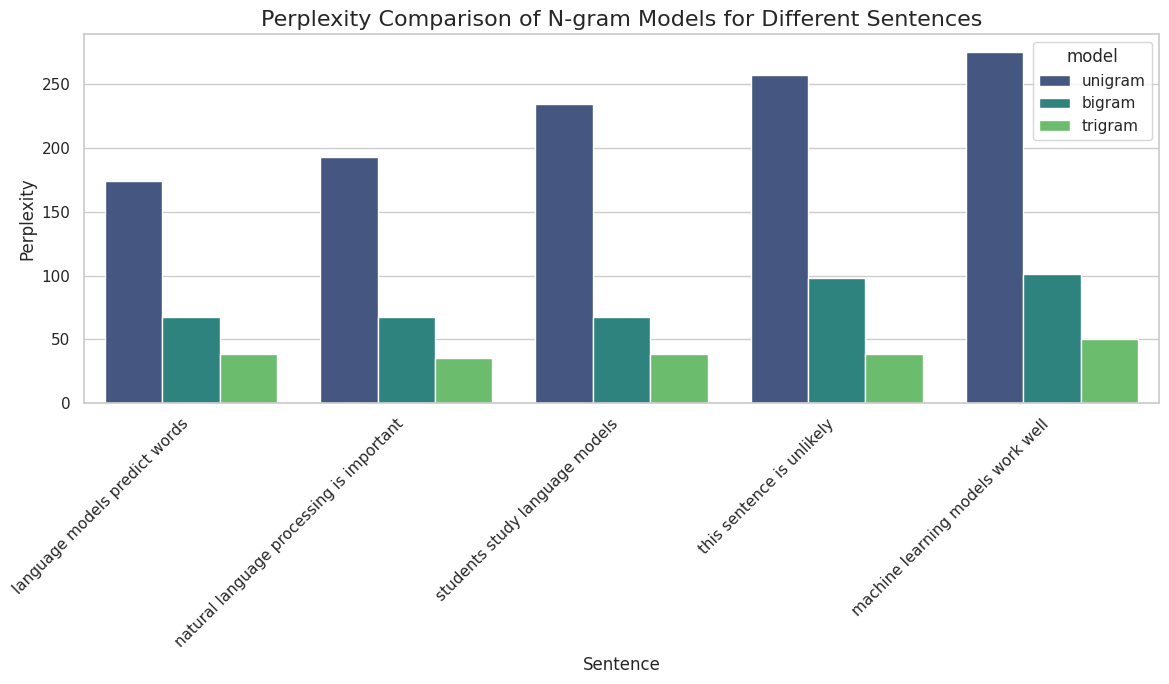

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format for easier plotting with seaborn
# This transforms the 'unigram', 'bigram', 'trigram' columns into a single 'model' column
# and their values into a 'perplexity' column.
perplexity_melted = perplexity_df.melt(id_vars=['sentence'], var_name='model', value_name='perplexity')

# Set the style of the plots
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x='sentence', y='perplexity', hue='model', data=perplexity_melted, palette='viridis')

# Add titles and labels for clarity
plt.title('Perplexity Comparison of N-gram Models for Different Sentences', fontsize=16)
plt.xlabel('Sentence', fontsize=12)
plt.ylabel('Perplexity', fontsize=12)

# Rotate x-axis labels for better readability, especially for long sentences
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()